## 딥러닝

### 심층신경망

In [68]:
# 모듈 로드
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

- 이미 이전장에서 다운로드 했기때문에 다시 다운로드 하지 않음

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [71]:
train_input = train_input.reshape(-1, 28*28)
test_input = test_input.reshape(-1, 28*28)

In [72]:
# 스케일링
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input.astype(np.float64))
test_scaled = scaler.transform(test_input.astype(np.float64))


In [73]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size= 0.2, random_state=42
)

In [74]:
print(train_scaled.shape, val_scaled.shape, test_scaled.shape)
print(train_target.shape, val_target.shape, test_target.shape)

(48000, 784) (12000, 784) (10000, 784)
(48000,) (12000,) (10000,)


#### 심층신경망 만들기

In [75]:
# 밀집층 생성
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden')
dense2 = keras.layers.Dense(10, activation='softmax', name='output')

In [76]:
# 신경망 모델 생성
model = keras.Sequential([dense1, dense2])

In [ ]:
# 모델 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 심층신경망 만들기2

In [78]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name = 'Fashion_MNIST_Model')

In [79]:
model.summary()

Model: "Fashion_MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
# 모델 훈련 
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [81]:
# 훈련
model.fit(train_scaled, train_target, epochs=100)

Epoch 1/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4665 - accuracy: 0.8374
Epoch 2/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3560 - accuracy: 0.8724
Epoch 3/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3196 - accuracy: 0.8851
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2946 - accuracy: 0.8942
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.9016
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2573 - accuracy: 0.9078
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2415 - accuracy: 0.9136
Epoch 8/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2298 - accuracy: 0.9182
Epoch 9/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2162 - accuracy: 0.9240
Epoch 10/100
1500/1500 [==============================] - 2s 1ms/step - l

In [82]:
model.evaluate(val_scaled, val_target)
# 검증 정확도 : 87.8%

375/375 [==============================] - 0s 873us/step - loss: 0.8694 - accuracy: 0.8729


[0.8694310188293457, 0.8729166388511658]

In [83]:
pred_result = model.predict(test_scaled)

313/313 [==============================] - 0s 834us/step


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [85]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [93]:
class_nanes = ['티셔츠', '바지', '스웨터', '드레스', '코드', '샌달', '셔츠', '스니커즈', '가방', '앵글부츠']

In [98]:
# 테스트이미지와 예측결과 시각화
def show_image(index):
    plt.figure(figsize=(2,2))
    plt.imshow(test_input[index].reshape(28, 28), cmap='gray_r')
    true_label = class_nanes[test_target[index]]
    pred_label = class_nanes[np.argmax(pred_result[index])]

    # plt.title(f'실제: {test_target}, 예측: {pred_result}')
    plt.text(0, -6, f'실제 : {true_label}', fontsize=12,color='blue')
    plt.text(0, -3, f'예측 : {pred_label}', fontsize=12,color='red', fontweight='bold')


    plt.axis('off')
    plt.show()

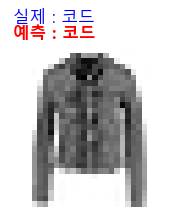

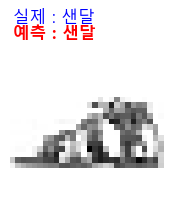

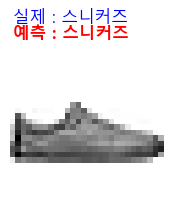

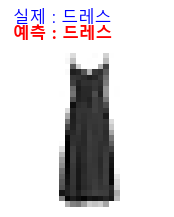

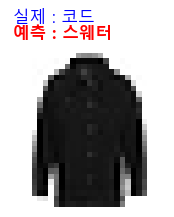

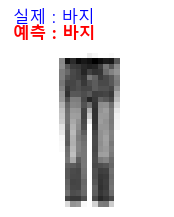

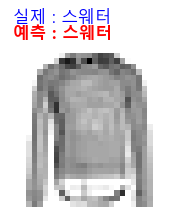

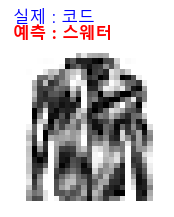

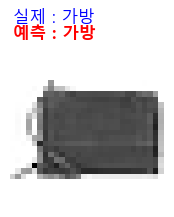

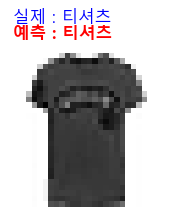

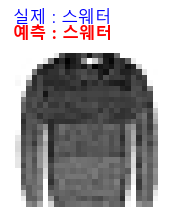

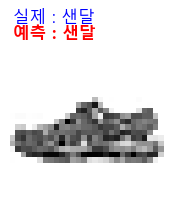

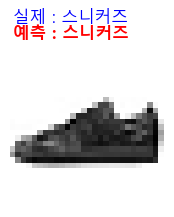

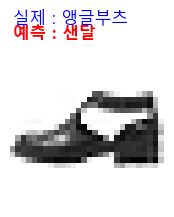

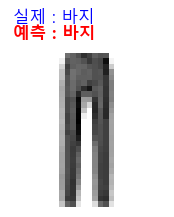

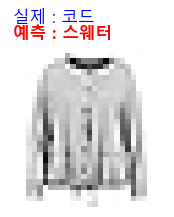

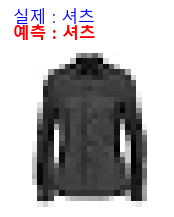

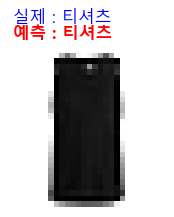

In [99]:
for i in range(10, 28):
    show_image(i)

#### 렐루 함수

- 인공신경망 은닉층에 초기에는 Sigmooid 함수 사용
    - 단점: 오른쪽, 왼쪽 끝으로 갈 수록 그래프가 누워있어서 올바른 출력을 못만듬

- 렐루함수(ReLU) : 수정된 선형유닛 뜻의 함수 

    <img src='../image/ml0011.png' width='500'>

#### Flatten 객체
- 이미지 2차원배열을 1차원으로 변경할때 np.reshape() 사용
- Flatten 클래스가 위의 일을 대신해줌 

In [126]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28), name= 'Flatten'),
    keras.layers.Dense(100, activation = 'relu', name = 'hidden'),
    keras.layers.Dense(10, activation = 'softmax', name ='outout')
], name = 'Fashion_MNIST_RELU')

In [127]:
model2.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 outout (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [134]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [135]:
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

In [136]:
# 훈련세트, 검증세트
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state= 42
)

In [137]:
# 모델 설정
model2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [138]:
# 모델 훈련
model2.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5346 - accuracy: 0.8112
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3947 - accuracy: 0.8590
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3546 - accuracy: 0.8713
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3315 - accuracy: 0.8795
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3152 - accuracy: 0.8876
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3041 - accuracy: 0.8903
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2928 - accuracy: 0.8955
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2839 - accuracy: 0.8983
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2781 - accuracy: 0.9006
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.270

In [146]:
model2.evaluate(val_scaled, val_target)
# ReLU함수 사용시, Sigmoid함수 사용시 0.01% 개선

375/375 [==============================] - 0s 1ms/step - loss: 0.4398 - accuracy: 0.8749


[0.4397814869880676, 0.874916672706604]

#### 옵티마이저
- 하이퍼파라미터값 최적화

In [147]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28), name= 'Flatten'),
    keras.layers.Dense(100, activation = 'relu', name = 'hidden'),
    keras.layers.Dense(10, activation = 'softmax', name ='outout')
], name = 'Fashion_MNIST_RELU')

In [148]:
# 모델3 설정, 최적화는optimizer는 adam만 쓴다 
model3.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer= 'adam')

In [149]:
# 모델 훈련 ,모델훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model3.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 3s 1ms/step - loss: 0.5291 - accuracy: 0.8147
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3955 - accuracy: 0.8594
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3539 - accuracy: 0.8716
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3281 - accuracy: 0.8800
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3090 - accuracy: 0.8864
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2947 - accuracy: 0.8915
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2789 - accuracy: 0.8978
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2691 - accuracy: 0.8998
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2604 - accuracy: 0.9040
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.250

- optimizer 사용시 0.01정도 향상

In [150]:
model3.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 981us/step - loss: 0.3339 - accuracy: 0.8889


[0.33390629291534424, 0.8889166712760925]

#### 드롭아웃
- 훈련과정 밀집층에 일부 뉴런을 꺼버림.

In [151]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28), name= 'Flatten'),
    keras.layers.Dense(100, activation = 'relu', name = 'hidden'),
    keras.layers.Dropout(0.3, name = 'Dropout'),
    keras.layers.Dense(10, activation = 'softmax', name ='outout')
], name = 'Fashion_MNIST_RELU')

In [152]:
# 모델4 설정, 최적화는optimizer는 adam만 쓴다 
model4.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer= 'adam')

In [156]:
# 모델 훈련 ,모델훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model4.fit(train_scaled, train_target, epochs=20)
# 훈련 95%, 검증이 88% -7 정도 차이

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2798 - accuracy: 0.8954
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2710 - accuracy: 0.8979
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2743 - accuracy: 0.8953
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2687 - accuracy: 0.8996
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2656 - accuracy: 0.8978
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2630 - accuracy: 0.9025
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2603 - accuracy: 0.9029
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2551 - accuracy: 0.9040
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2553 - accuracy: 0.9040
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.254

In [155]:
model4.evaluate(val_scaled, val_target)
# 훈련 89%, 검증이 88% 1차이(훈련과 검증사이에 차이가 거의 없음)

375/375 [==============================] - 0s 881us/step - loss: 0.3314 - accuracy: 0.8836


[0.3313919007778168, 0.8835833072662354]

- 드롭아웃을하면 정확도가 떨어짐 > 훈련과 검증(테스트) 사이에 정확도 차이가 줄어듬
- 과대적합(훈련세트 훈련에 너무 치중하여서 정확도가 너무 높은것) 방지

#### 모델의 저장과 복원
- 훈련시간이 딥러닝에 크게 좌우됨. 저장이 없으면 다시 훈련시키고 시간을 소요해야 됨
- 파일로 저장후 모델에 대한 구조와 파라미터 만 저장하는 두가지 방법이 존재 

In [157]:
# 모델4 저장 - 파라미터만 저장
model4.save_weights('./model4-weight.h5')


In [158]:
# 모델4 저장 - 전체(모델 구조와 파라미터) 저장
model4.save('./model4-whole.h5')

c:\Source\iot-dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##### 모델 사용
- 파라미터만 저장한 파일을 사용하려면, 먼저 모델을 생성해야한다.

In [159]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28), name= 'Flatten5'),
    keras.layers.Dense(100, activation = 'relu', name = 'hidden5'),
    keras.layers.Dropout(0.3, name = 'Dropout5'),
    keras.layers.Dense(10, activation = 'softmax', name ='outout5')
], name = 'Fashion_MNIST_RELU')

In [ ]:
model5.load_weights('./model4-weight.h5')

In [161]:
pred_result = model5.predict(test_scaled)

313/313 [==============================] - 0s 860us/step


- 모델까지 전부 생성해주는 방법

In [162]:
model6 = keras.models.load_model('./model4-whole.h5')

In [163]:
model6.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 Dropout (Dropout)           (None, 100)               0         
                                                                 
 outout (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [164]:
model6.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 926us/step - loss: 0.3745 - accuracy: 0.8815


[0.3745090663433075, 0.8815000057220459]

#### 콜백
- 실행도중 다른일을 할 수 있도록 해주는 기능
- `조기종료`를 위해서 사용

In [165]:
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28), name= 'Flatten'),
    keras.layers.Dense(100, activation = 'relu', name = 'hidden'),
    keras.layers.Dropout(0.3, name = 'Dropout'),
    keras.layers.Dense(10, activation = 'softmax', name ='outout')
], name = 'Fashion_MNIST_RELU')

In [166]:
model7.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer= 'adam')

In [169]:
# 에포크마다 모델 저장기능
checkpoint_cb =keras.callbacks.ModelCheckpoint('./best-model.h5',save_best_only=True) # 최고 상태면 저장
# 조기종효 콜백
# 두번이상 훈련값이 동일하면 조지종료, 이전 최고상태로 복구
early_stopp_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights= True)

In [170]:
model7.fit(train_scaled, train_target, epochs=20,validation_data=(val_scaled, val_target),
           callbacks=[checkpoint_cb, early_stopp_cb] )

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5896 - accuracy: 0.7933 - val_loss: 0.4263 - val_accuracy: 0.8428
Epoch 2/20
 128/1500 [=>............................] - ETA: 1s - loss: 0.4577 - accuracy: 0.8359

c:\Source\iot-dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 2s 1ms/step - loss: 0.4433 - accuracy: 0.8417 - val_loss: 0.3970 - val_accuracy: 0.8549
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4079 - accuracy: 0.8505 - val_loss: 0.3814 - val_accuracy: 0.8588
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3847 - accuracy: 0.8609 - val_loss: 0.3581 - val_accuracy: 0.8689
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3680 - accuracy: 0.8630 - val_loss: 0.3458 - val_accuracy: 0.8759
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3559 - accuracy: 0.8684 - val_loss: 0.3665 - val_accuracy: 0.8662
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3460 - accuracy: 0.8716 - val_loss: 0.3462 - val_accuracy: 0.8757


- 20번중 15번반복에서 조기종료

In [171]:
model7.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 875us/step - loss: 0.3458 - accuracy: 0.8759


[0.3457825183868408, 0.8759166598320007]

In [172]:
model7.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 898us/step - loss: 0.3724 - accuracy: 0.8663


[0.3723904490470886, 0.8662999868392944]

In [174]:
early_stopp_cb.stopped_epoch

6

- 20번중 15번반복에서 조기 종료

#### 결론
- `심층 신경망` : 2개 이상의 밀집층을 포함한 신경망 모델. 다층 인공신경망
- `렐루함수` : 시그모이드 함수의 단점을 보완한 활성화 함수
- `옵티마이저` : 신경망의 가중치(기울기)와 절편을 학습하기 위한 알고리즘 또는 방법. `Adam`,SGD(확률적 경사하강법), RMSprp..

- `드롭아웃`: 밀집층의 뉴런은 임의로 꺼서 훈련을 덜 시키는 것. 과대적합을 막기위해서 수행
- 모델 저장과 복원 : 이미 훈련된 데이터를 저장했다가 나중에 다시 쓰기 위해서 
- `콜백` : 에포크마다 모델 저장 또는 조기종료를 위해서 훈련 도중에 다른 기능을 수행하는 것